# Video 4. Python Basics for R&D Scientists - Clustering Data

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
file = 'data/iris.csv' #imports data from 'data folder'
df = pd.read_csv(file)
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
# split data into X and y variables

#######
# equivalent outputs
X  = df.select_dtypes(float)
X1 = df.select_dtypes('number')
X2 = df.iloc[:,:4] # all rows and the first 4 columns
X3 = df.loc[:, 'sepal_length':'petal_width']

#######
# equivalent outputs
y = df.select_dtypes(object)
y1= df['species']
y2=df.species

In [6]:
# instantiate model steps
scaler = StandardScaler()
pca = PCA(n_components = 3)

In [8]:
scaled_x = scaler.fit_transform(X)

In [16]:
scores = pca.fit_transform(scaled_x)
# scores

In [13]:
['pc'+str(i+1) for i in range (3)]

['pc1', 'pc2', 'pc3']

In [14]:
scores_df = pd.DataFrame(scores, columns=['pc'+str(i+1) for i in range (3)])
scores_df.head()

,pc1,pc2,pc3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [17]:
scores_df = scores_df.merge(y, left_index = True, right_index = True)
scores_df.head()

,pc1,pc2,pc3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa


In [18]:
#loading data

loadings_df = pd.DataFrame(pca.components_, columns = X.columns, index = ['pc'+str(i+1) for i in range (3)]).T.reset_index()
loadings_df.rename(columns = {'index':'variable'}, inplace = True)
loadings_df.head()

,variable,pc1,pc2,pc3
0,sepal_length,0.521066,0.377418,-0.719566
1,sepal_width,-0.269347,0.923296,0.244382
2,petal_length,0.580413,0.024492,0.142126
3,petal_width,0.564857,0.066942,0.634273


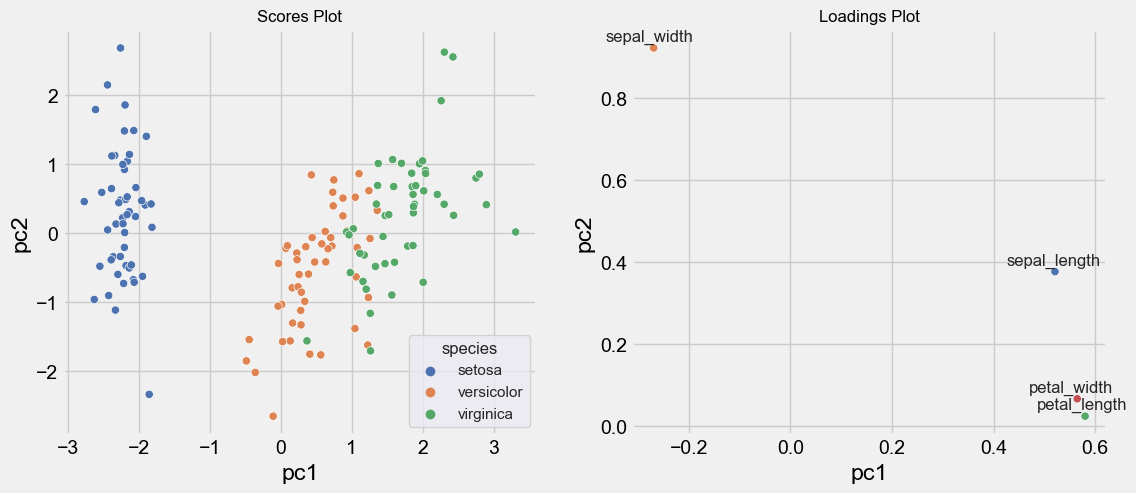

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

sns.set_theme()

sns.scatterplot(scores_df,
                x = 'pc1', 
                y = 'pc2',
                hue = 'species',
                ax = axes[0], 
               ).set(title = 'Scores Plot')

sns.scatterplot(loadings_df,
                x = 'pc1', 
                y = 'pc2',
                hue = 'variable',
                ax = axes[1],
                label = 'variable',
                legend = None
               ).set(title = 'Loadings Plot')

for i, data in loadings_df.iterrows():
    axes[1].annotate(f'{data["variable"]}', xy=(data['pc1'], data['pc2']), xytext=(-35, 5), textcoords='offset points')


[Text(0.5, 1.0, 'Loadings Plot')]

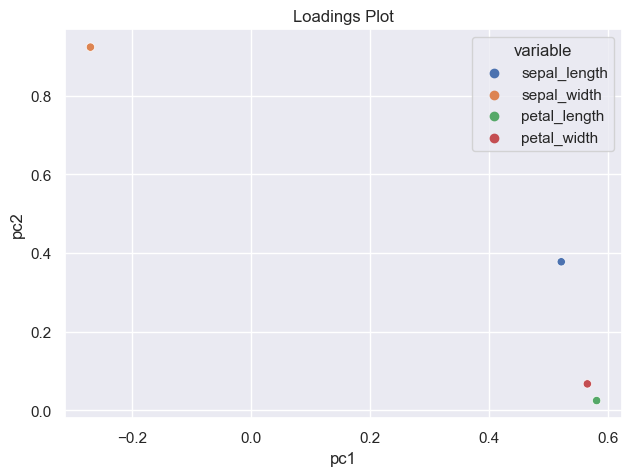

In [21]:
sns.scatterplot(loadings_df,
                x = 'pc1', 
                y = 'pc2',
                hue = 'variable', 
               ).set(title = 'Loadings Plot')